In [13]:
import pandas as pd
import numpy as np

In [21]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ["Sepal_Length","Sepal_Width","Petal_Length","Petal_Width","Class"]
data = pd.read_csv(url, header=None, names=col_names)

In [22]:
data.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  149 non-null    float64
 1   Sepal_Width   149 non-null    float64
 2   Petal_Length  149 non-null    float64
 3   Petal_Width   149 non-null    float64
 4   Class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [24]:
data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [25]:
mapeo = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
data['Class'] = data['Class'].map(mapeo)

In [71]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import classification_report

## Train-Test split

In [61]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

## Fit the model

[Text(0.375, 0.875, 'x[3] <= 0.8\ngini = 0.666\nsamples = 119\nvalue = [41, 41, 37]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.55\ngini = 0.499\nsamples = 78\nvalue = [0, 41, 37]'),
 Text(0.25, 0.375, 'x[2] <= 5.25\ngini = 0.05\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.375, 'x[3] <= 1.75\ngini = 0.142\nsamples = 39\nvalue = [0, 3, 36]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(0.875, 0.125, 'gini = 0.056\nsamples = 35\nvalue = [0, 1, 34]')]

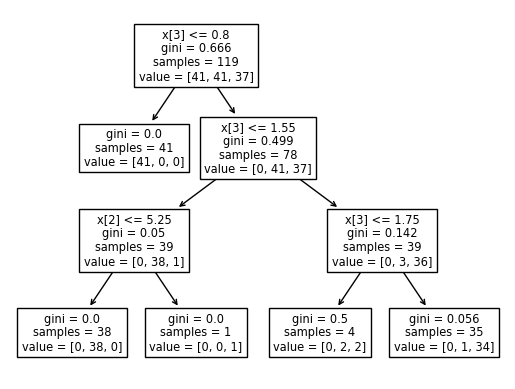

In [35]:
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
classifier.fit(X_train,Y_train)
#classifier.print_tree()
tree.plot_tree(classifier)

## Test the model 

In [77]:
Y_pred = classifier.predict(X_test) 
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8666666666666667

## Again 

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree

In [63]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values.reshape(-1,1)

[Text(0.3333333333333333, 0.875, 'x[3] <= 0.7\ngini = 0.661\nsamples = 29\nvalue = [8, 11, 10]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.65\ngini = 0.499\nsamples = 21\nvalue = [0, 11, 10]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 9\nvalue = [0, 9, 0]'),
 Text(0.6666666666666666, 0.375, 'x[2] <= 5.05\ngini = 0.278\nsamples = 12\nvalue = [0, 2, 10]'),
 Text(0.5, 0.125, 'gini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [0, 0, 8]')]

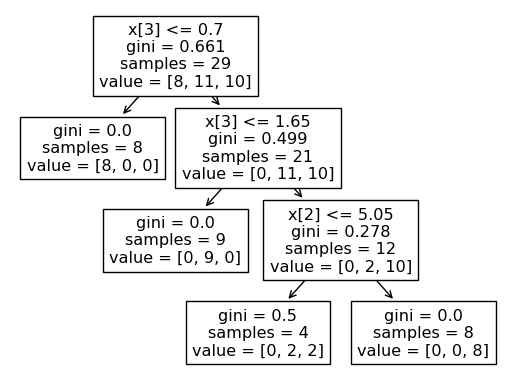

In [72]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.8, random_state=41)

classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(train_x,train_y)
tree.plot_tree(classifier)

In [83]:
predict = classifier.predict(test_x)
predict

array([0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 0, 1, 2, 0,
       0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0,
       2, 1, 0, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 1, 1, 1, 0, 2,
       1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 2, 0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 2, 1, 0, 0, 2, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 0, 1, 0,
       1, 0, 1, 2, 2, 2, 0, 0, 0, 0], dtype=int64)

In [81]:
report= classification_report(test_y, predict)
report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        41\n           1       0.80      1.00      0.89        39\n           2       1.00      0.75      0.86        40\n\n    accuracy                           0.92       120\n   macro avg       0.93      0.92      0.91       120\nweighted avg       0.93      0.92      0.92       120\n'

In [82]:
accuracy = accuracy_score(test_y, predict)
accuracy

0.9166666666666666

# Random Forest

In [87]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values.reshape(-1,1)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.8, random_state=41)

classifier = RandomForestClassifier(max_depth=3)
classifier.fit(train_x,train_y)

C:\Users\Pablo\AppData\Local\Temp\ipykernel_18660\261580541.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(train_x,train_y)


RandomForestClassifier(max_depth=3)

In [88]:
predict = classifier.predict(test_x)
predict

array([0, 0, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 0, 1, 2, 0,
       0, 1, 1, 2, 2, 1, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 2, 0, 1, 2, 0,
       2, 1, 0, 1, 2, 1, 1, 0, 0, 1, 2, 0, 2, 0, 0, 2, 0, 1, 1, 1, 0, 2,
       1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 0, 1, 2, 1, 1, 0, 1, 0,
       1, 0, 1, 2, 2, 2, 0, 0, 0, 0], dtype=int64)

In [89]:
report= classification_report(test_y, predict)
report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        41\n           1       0.91      1.00      0.95        39\n           2       1.00      0.90      0.95        40\n\n    accuracy                           0.97       120\n   macro avg       0.97      0.97      0.97       120\nweighted avg       0.97      0.97      0.97       120\n'

In [90]:
accuracy = accuracy_score(test_y, predict)
accuracy

0.9666666666666667

## Node class 

In [91]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

## Tree Class

In [95]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

In [96]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

In [97]:
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
classifier.fit(X_train,Y_train)
classifier.print_tree()

X_2 <= 1.7 ? 0.33904421497105636
 left:0.0
 right:X_3 <= 1.5 ? 0.40269559500328744
  left:X_2 <= 4.9 ? 0.04996712689020377
    left:1.0
    right:2.0
  right:X_2 <= 4.8 ? 0.040912933220625364
    left:X_1 <= 2.8 ? 0.5
        left:2.0
        right:1.0
    right:X_3 <= 1.7 ? 0.026938775510204082
        left:2.0
        right:2.0


In [98]:
Y_pred = classifier.predict(X_test) 
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8666666666666667